# Preprocessing

## Train, Eval, Test Split

![](https://cdn-images-1.medium.com/max/2000/1*H5CUZ0lQqRk6xbzNRa2M9A.png)

 - 3 TRAINING videos follow the trajectory above.
 - 1 EVAL video uses a different trajectory and is colored differently.
 - 1 TEST video uses a different trajectory.

In [1]:
import cv2
import matplotlib.pyplot as plt
from skvideo.io import FFmpegReader

In [2]:
filenames = [
    './data/6zXXZvVvTFs',
    './data/2AYaxTiWKoY',
    './data/sYbBgkP9aMo',
    './data/pF6xCZA72o0',
    './data/SuZVyOlgVek',
]
trims = [
    (960, 1403),
    (550, 1515),
    (1, 331),
    (1465, 2201),
    (15, 437),
]
crops = [
    (35, 50, 445, 300),
    (0, 13, 640, 335),
    (5, 22, 475, 341),
    (20, 3, 620, 360),
    (79, 18, 560, 360),
]
labels = [
    'Train',
    'Train',
    'Train',
    'Eval',
    'Test',
]

In [3]:
first_frames = []
last_frames = []
for filename, trim, crop in zip(filenames, trims, crops):
    # Get video frames with scikit-video
    reader = FFmpegReader(filename + '.mp4',
                          inputdict={'-r': '15'},
                          outputdict={'-r': '15'}
                          )

    for frame_idx, frame in enumerate(reader.nextFrame()):
        # Trim video (time)
        if frame_idx < trim[0]:
            continue
        elif frame_idx == trim[0]:
            # Crop frames (space)
            frame = frame[crop[1]:crop[3], crop[0]:crop[2], :]
            frame = cv2.resize(frame, (140, 140))
            first_frames.append(frame)
        elif frame_idx < trim[1] - 1:
            continue
        elif frame_idx == trim[1] - 1:
            frame = frame[crop[1]:crop[3], crop[0]:crop[2], :]
            frame = cv2.resize(frame, (140, 140))
            last_frames.append(frame)
            break
        else:
            break

## First Frame

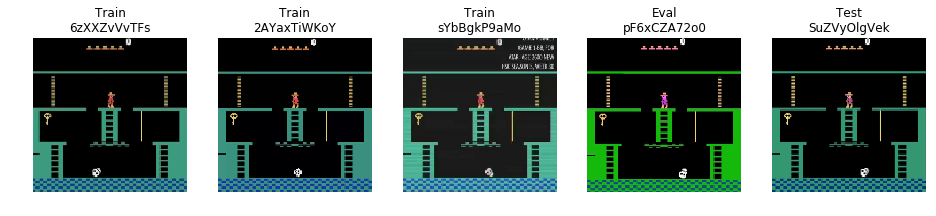

In [4]:
fig = plt.figure(figsize=(16, 8))
for i, frame in enumerate(first_frames):
    fig.add_subplot(1, len(first_frames), i+1)
    plt.imshow(frame)
    plt.axis('off')
    plt.title(labels[i] + '\n' + filenames[i].split('/')[-1])
plt.axis('off')
plt.show()

## Last Frame in First Room

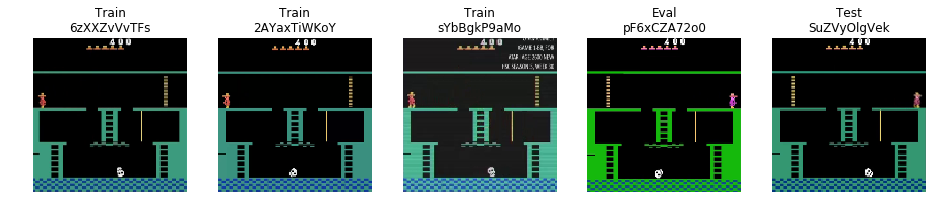

In [5]:
fig = plt.figure(figsize=(16, 8))
for i, frame in enumerate(last_frames):
    fig.add_subplot(1, len(last_frames), i+1)
    plt.imshow(frame)
    plt.axis('off')
    plt.title(labels[i] + '\n' + filenames[i].split('/')[-1])
plt.axis('off')
plt.show()

## First and Last

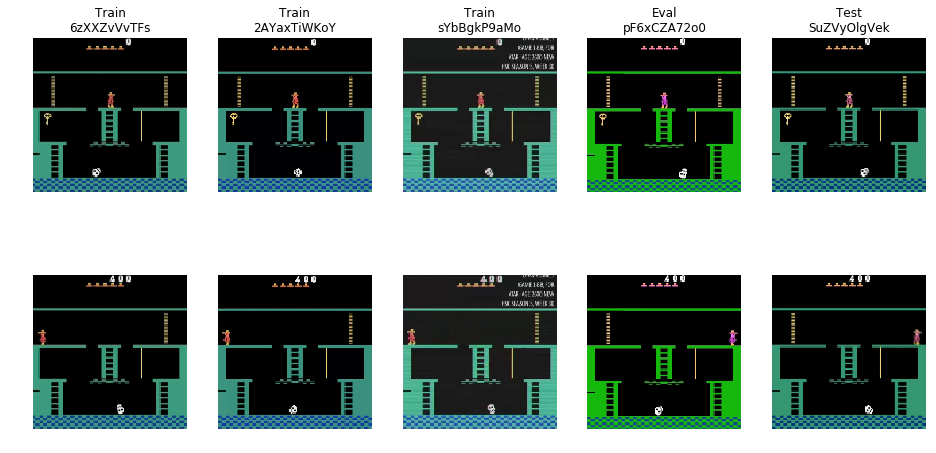

In [6]:
fig = plt.figure(figsize=(16, 8))
fig.tight_layout()
for i, frame in enumerate(first_frames):
    fig.add_subplot(2, len(first_frames), i+1)
    plt.imshow(frame)
    plt.axis('off')
    plt.title(labels[i] + '\n' + filenames[i].split('/')[-1])
for i, frame in enumerate(last_frames):
    fig.add_subplot(2, len(last_frames), len(last_frames)+i+1)
    plt.imshow(frame)
    plt.axis('off')
plt.axis('off')
plt.show()